In [123]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
import seaborn as sns
import sklearn.preprocessing 
from sklearn.preprocessing import scale 


In [3]:
enedis = pd.read_csv("/Users/jeremiedarracq/Stat-app/enedis.csv",sep=";")
enedis["date"]=enedis["Horodate"].apply(lambda x : x[0:10])
enedis

,Horodate,Région,Code région,Profil,Plage de puissance souscrite,Nb points soutirage,Total énergie soutirée (Wh),Courbe Moyenne n°1 (Wh),Indice représentativité Courbe n°1 (%),Courbe Moyenne n°2 (Wh),Indice représentativité Courbe n°2 (%),Courbe Moyenne n°1 + n°2 (Wh),Indice représentativité Courbe n°1 + n°2 (%),Jour max du mois (0/1),Semaine max du mois (0/1),date
0,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,84,ENT3 (+ ENT4 + ENT5),P0: Total <= 36 kVA,1376,2095739.0,2084.0,48,1368.0,48,1727.0,97,0,1,2022-09-30
1,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,84,PRO1 (+ PRO1WE),P4: ]9-12] kVA,52691,12376840.0,443.0,8,202.0,8,322.0,16,0,1,2022-09-30
2,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,84,PRO1 (+ PRO1WE),P8: ]24-30] kVA,8350,6545703.0,1012.0,10,474.0,11,742.0,22,0,1,2022-09-30
3,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,84,PRO2 (+ PRO2WE + PRO6),P3: ]6-9] kVA,19759,7072016.0,693.0,13,466.0,13,579.0,26,0,1,2022-09-30
4,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,84,PRO5,P1: ]0-3] kVA,55645,18921676.0,428.0,16,239.0,16,334.0,33,0,1,2022-09-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4874994,2022-06-19T18:30:00+02:00,Bretagne,53,PRO1 (+ PRO1WE),P7: ]18-24] kVA,5742,4196121.0,715.0,13,497.0,14,603.0,27,0,1,2022-06-19
4874995,2022-06-19T18:30:00+02:00,Bretagne,53,PRO1 (+ PRO1WE),P9: ]30-36] kVA,12137,13049064.0,1082.0,14,597.0,15,834.0,29,0,1,2022-06-19
4874996,2022-06-19T18:30:00+02:00,Bretagne,53,PRO2 (+ PRO2WE + PRO6),P6: ]15-18] kVA,11245,10172680.0,1113.0,14,801.0,14,956.0,29,0,1,2022-06-19
4874997,2022-06-19T18:30:00+02:00,Bretagne,53,PRO3,P5: ]12-15] kVA,31,NaN,NaN,S,NaN,S,NaN,S,0,1,2022-06-19


Région,Auvergne-Rhône-Alpes,Bourgogne-Franche-Comté,Bretagne,Centre-Val de Loire,Grand-Est,Hauts-de-France,Normandie,Nouvelle Aquitaine,Occitanie,Pays de la Loire,Provence-Alpes-Côte d'Azur,Île-de-France
Plage de puissance souscrite,,,,,,,,,,,,
P0: Total <= 36 kVA,0.013213,0.013212,0.013211,0.013211,0.013211,0.013211,0.013211,0.013211,0.013212,0.013212,0.013211,0.013211
P1 : ]0-12] kVA,0.001016,0.001016,0.001016,0.001016,0.001016,0.001016,0.001016,0.001016,0.001016,0.001016,0.001016,0.001016
P1: ]0-3] kVA,0.003049,0.003049,0.003049,0.003049,0.003049,0.003049,0.003049,0.003049,0.003049,0.003049,0.003049,0.003049
P1: ]0-6] kVA,0.003049,0.003049,0.003049,0.003049,0.003049,0.003049,0.003049,0.003049,0.003049,0.003049,0.003049,0.003049
P1: ]0-9] kVA,0.003049,0.003049,0.003049,0.003049,0.003049,0.003049,0.003049,0.003049,0.003049,0.003049,0.003049,0.003049
P2: ]3-6] kVA,0.003049,0.003049,0.003049,0.003049,0.003049,0.003049,0.003049,0.003049,0.003049,0.003049,0.003049,0.003049
P3: ]6-9] kVA,0.006098,0.006098,0.006098,0.006097,0.006098,0.006098,0.006098,0.006098,0.006098,0.006097,0.006098,0.006098
P4: ]9-12] kVA,0.009147,0.009147,0.009146,0.009147,0.009146,0.009146,0.009146,0.009146,0.009146,0.009146,0.009146,0.009146
P5: ]12-15] kVA,0.010162,0.010163,0.010163,0.010162,0.010162,0.010162,0.010162,0.010163,0.010163,0.010162,0.010163,0.010162


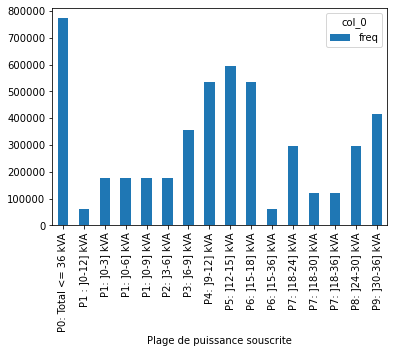

In [4]:
## Stat descriptibe Plage de puissance soucrite 
## Stat Univarié 
enedis["Plage de puissance souscrite"].value_counts()
t = pd.crosstab(enedis["Plage de puissance souscrite"] , "freq")
t.plot.bar()
pd.crosstab(enedis["Plage de puissance souscrite"], "freq", normalize=True)

#Stat bivarié 

pd.crosstab(enedis["Plage de puissance souscrite"],enedis["Région"])
pd.crosstab(enedis["Plage de puissance souscrite"],enedis["Région"],normalize=True)



Plage de puissance souscrite,P0: Total <= 36 kVA,P1 : ]0-12] kVA,P1: ]0-3] kVA,P1: ]0-6] kVA,P1: ]0-9] kVA,P2: ]3-6] kVA,P3: ]6-9] kVA,P4: ]9-12] kVA,P5: ]12-15] kVA,P6: ]15-18] kVA,P6: ]15-36] kVA,P7: ]18-24] kVA,P7: ]18-30] kVA,P7: ]18-36] kVA,P8: ]24-30] kVA,P9: ]30-36] kVA
Profil,,,,,,,,,,,,,,,,
ENT1 (+ ENT2),0.012195,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENT3 (+ ENT4 + ENT5),0.012195,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PRO1 (+ PRO1WE),0.012195,0.000000,0.012195,0.000000,0.000000,0.012195,0.012195,0.012195,0.012195,0.012195,0.000000,0.012195,0.000000,0.000000,0.012195,0.012195
PRO2 (+ PRO2WE + PRO6),0.012195,0.000000,0.000000,0.012195,0.000000,0.000000,0.012195,0.012195,0.012195,0.012195,0.000000,0.012195,0.000000,0.000000,0.012195,0.012196
PRO3,0.012195,0.000000,0.000000,0.000000,0.012195,0.000000,0.000000,0.012195,0.012195,0.012195,0.000000,0.000000,0.012195,0.000000,0.000000,0.012195
PRO4,0.012195,0.012195,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012196,0.012195,0.000000,0.000000,0.000000,0.012195,0.000000,0.000000
PRO5,0.012195,0.000000,0.012195,0.000000,0.000000,0.012195,0.012196,0.012195,0.012195,0.012195,0.000000,0.012195,0.000000,0.000000,0.012195,0.012195
RES1 (+ RES1WE),0.012195,0.000000,0.012195,0.000000,0.000000,0.012195,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RES11 (+ RES11WE),0.012195,0.000000,0.000000,0.000000,0.000000,0.000000,0.012195,0.012195,0.012195,0.012195,0.000000,0.012195,0.000000,0.000000,0.012195,0.012195


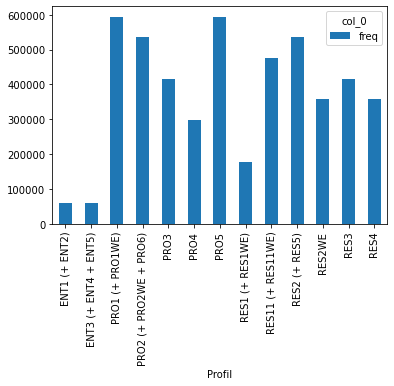

In [5]:
## Stat descriptibe Plage de puissance soucrite 
## Stat Univarié 
enedis["Profil"].value_counts()
t = pd.crosstab(enedis["Profil"] , "freq")
t.plot.bar()
pd.crosstab(enedis["Profil"], "freq", normalize=True)

#Stat bivarié 
pd.crosstab(enedis["Profil"],enedis["Région"],normalize=True)
pd.crosstab(enedis["Profil"],enedis["Plage de puissance souscrite"],normalize=True)



In [6]:
enedis_conso = enedis[enedis["Plage de puissance souscrite"] == "P0: Total <= 36 kVA"]
enedis_conso

,Horodate,Région,Code région,Profil,Plage de puissance souscrite,Nb points soutirage,Total énergie soutirée (Wh),Courbe Moyenne n°1 (Wh),Indice représentativité Courbe n°1 (%),Courbe Moyenne n°2 (Wh),Indice représentativité Courbe n°2 (%),Courbe Moyenne n°1 + n°2 (Wh),Indice représentativité Courbe n°1 + n°2 (%),Jour max du mois (0/1),Semaine max du mois (0/1),date
0,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,84,ENT3 (+ ENT4 + ENT5),P0: Total <= 36 kVA,1376,2095739.0,2084.0,48,1368.0,48,1727.0,97,0,1,2022-09-30
8,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,84,RES2WE,P0: Total <= 36 kVA,30090,10333977.0,400.0,15,200.0,15,301.0,30,0,1,2022-09-30
10,2022-09-30T23:30:00+02:00,Bourgogne-Franche-Comté,27,PRO2 (+ PRO2WE + PRO6),P0: Total <= 36 kVA,47561,33811703.0,948.0,14,691.0,14,819.0,28,0,1,2022-09-30
15,2022-09-30T23:30:00+02:00,Bourgogne-Franche-Comté,27,PRO4,P0: Total <= 36 kVA,2876,1425313.0,588.0,14,686.0,14,475.0,29,0,1,2022-09-30
21,2022-09-30T23:30:00+02:00,Bretagne,53,PRO5,P0: Total <= 36 kVA,25005,15618899.0,525.0,34,603.0,35,564.0,69,0,1,2022-09-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4874964,2022-06-19T18:30:00+02:00,Auvergne-Rhône-Alpes,84,PRO2 (+ PRO2WE + PRO6),P0: Total <= 36 kVA,117212,84653341.0,646.0,13,1002.0,13,824.0,26,0,1,2022-06-19
4874966,2022-06-19T18:30:00+02:00,Auvergne-Rhône-Alpes,84,PRO4,P0: Total <= 36 kVA,7177,6962543.0,749.0,13,637.0,13,693.0,27,0,1,2022-06-19
4874972,2022-06-19T18:30:00+02:00,Auvergne-Rhône-Alpes,84,RES2WE,P0: Total <= 36 kVA,30903,5625480.0,355.0,15,309.0,15,333.0,31,0,1,2022-06-19
4874977,2022-06-19T18:30:00+02:00,Bourgogne-Franche-Comté,27,ENT1 (+ ENT2),P0: Total <= 36 kVA,49,NaN,NaN,S,NaN,S,NaN,S,0,1,2022-06-19


<ipython-input-21-374a8cb9124f>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  enedis_conso_idf = enedis_conso[enedis["Région"] == "Île-de-France"]
<ipython-input-21-374a8cb9124f>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  enedis_conso_Bretagne = enedis_conso[enedis["Région"] == "Bretagne"]
<ipython-input-21-374a8cb9124f>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  enedis_conso_AuvergneRA = enedis_conso[enedis["Région"] == 'Auvergne-Rhône-Alpes']
<ipython-input-21-374a8cb9124f>:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  enedis_conso_BourgogneFC = enedis_conso[enedis["Région"] == 'Bourgogne-Franche-Comté']
<ipython-input-21-374a8cb9124f>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  enedis_conso_CentreVL = enedis_conso[enedis["Région"] == 'Centre-Val de Loire']
<ipython-input-21-374a8cb9124f>:34: UserWarn

<BarContainer object of 12 artists>

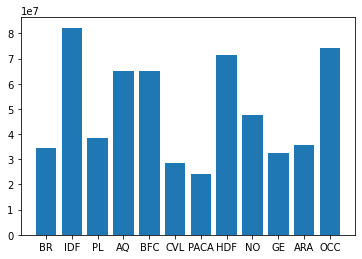

In [21]:
## Statistique descriptive consommation quotidienne moyenne pour chaque région 
## IDF 
enedis_conso_idf = enedis_conso[enedis["Région"] == "Île-de-France"]
conso_quotidienne_idf = enedis_conso_idf.groupby("date")["Total énergie soutirée (Wh)"].agg([np.mean])
conso_quotidienne_idf = conso_quotidienne_idf.rename(columns = {'mean': 'idf'})

##Bretagne 
enedis_conso_Bretagne = enedis_conso[enedis["Région"] == "Bretagne"]
conso_quotidienne_Bretagne = enedis_conso_Bretagne.groupby("date")["Total énergie soutirée (Wh)"].agg([np.mean])
conso_quotidienne_Bretagne = conso_quotidienne_Bretagne.rename(columns = {'mean': 'Bretagne'})
conso_quotidienne_Bretagne

Liste_Région = ['Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté','Centre-Val de Loire', 'Grand-Est', 'Hauts-de-France', 'Normandie', 'Nouvelle Aquitaine', 'Occitanie','Pays de la Loire', "Provence-Alpes-Côte d'Azur","Île-de-France","Bretagne"]

##Auvergne-Rhône-Alpes
enedis_conso_AuvergneRA = enedis_conso[enedis["Région"] == 'Auvergne-Rhône-Alpes']
conso_quotidienne_AuvergneRA= enedis_conso_AuvergneRA.groupby("date")["Total énergie soutirée (Wh)"].agg([np.mean])
conso_quotidienne_AuvergneRA = conso_quotidienne_AuvergneRA.rename(columns = {'mean': 'AuvergneRA'})
conso_quotidienne_AuvergneRA

##Bourgogne-france-Comté 
enedis_conso_BourgogneFC = enedis_conso[enedis["Région"] == 'Bourgogne-Franche-Comté']
conso_quotidienne_BourgogneFC= enedis_conso_BourgogneFC.groupby("date")["Total énergie soutirée (Wh)"].agg([np.mean])
conso_quotidienne_BourgogneFC = conso_quotidienne_BourgogneFC.rename(columns = {'mean': 'BourgogneFC'})
conso_quotidienne_BourgogneFC

##Centre-Val de Loire
enedis_conso_CentreVL = enedis_conso[enedis["Région"] == 'Centre-Val de Loire']
conso_quotidienne_CentreVL= enedis_conso_CentreVL.groupby("date")["Total énergie soutirée (Wh)"].agg([np.mean])
conso_quotidienne_CentreVL = conso_quotidienne_CentreVL.rename(columns = {'mean': 'CentreVL'})
conso_quotidienne_CentreVL

##Grand-Est
enedis_conso_GrandEst = enedis_conso[enedis["Région"] == 'Grand-Est']
conso_quotidienne_GrandEst= enedis_conso_GrandEst.groupby("date")["Total énergie soutirée (Wh)"].agg([np.mean])
conso_quotidienne_GrandEst = conso_quotidienne_GrandEst.rename(columns = {'mean': 'GrandEst'})
conso_quotidienne_GrandEst

##Normandie
enedis_conso_Normandie = enedis_conso[enedis["Région"] == 'Normandie']
conso_quotidienne_Normandie= enedis_conso_Normandie.groupby("date")["Total énergie soutirée (Wh)"].agg([np.mean])
conso_quotidienne_Normandie = conso_quotidienne_Normandie.rename(columns = {'mean': 'Normandie'})
conso_quotidienne_GrandEst

##haut-de-France
enedis_conso_HDF = enedis_conso[enedis["Région"] == 'Hauts-de-France']
conso_quotidienne_HDF= enedis_conso_HDF.groupby("date")["Total énergie soutirée (Wh)"].agg([np.mean])
conso_quotidienne_HDF = conso_quotidienne_HDF.rename(columns = {'mean': 'HDF'})
conso_quotidienne_HDF

##Occitanie
enedis_conso_Occitanie = enedis_conso[enedis["Région"] == 'Occitanie']
conso_quotidienne_Occitanie= enedis_conso_Occitanie.groupby("date")["Total énergie soutirée (Wh)"].agg([np.mean])
conso_quotidienne_Occitanie = conso_quotidienne_Occitanie.rename(columns = {'mean': 'Occitanie'})
conso_quotidienne_Occitanie

##Pays-de-la Loire
enedis_conso_PaysdeLoire = enedis_conso[enedis["Région"] == 'Pays de la Loire']
conso_quotidienne_PaysdeLoire= enedis_conso_PaysdeLoire.groupby("date")["Total énergie soutirée (Wh)"].agg([np.mean])
conso_quotidienne_PaysdeLoire = conso_quotidienne_PaysdeLoire.rename(columns = {'mean': 'PaysdeLoire'})
conso_quotidienne_PaysdeLoire

##'Nouvelle Aquitaine'
enedis_conso_Aquitaine = enedis_conso[enedis["Région"] == 'Nouvelle Aquitaine']
conso_quotidienne_Aquitaine= enedis_conso_Aquitaine.groupby("date")["Total énergie soutirée (Wh)"].agg([np.mean])
conso_quotidienne_Aquitaine = conso_quotidienne_Aquitaine.rename(columns = {'mean': 'Aquitaine'})
conso_quotidienne_Aquitaine

##'Nouvelle Aquitaine'
enedis_conso_ProvenceAlpesAzur = enedis_conso[enedis["Région"] == "Provence-Alpes-Côte d'Azur"]
conso_quotidienne_ProvenceAlpesAzur= enedis_conso_ProvenceAlpesAzur.groupby("date")["Total énergie soutirée (Wh)"].agg([np.mean])
conso_quotidienne_ProvenceAlpesAzur = conso_quotidienne_ProvenceAlpesAzur.rename(columns = {'mean': 'ProvenceAlpesAzur'})
conso_quotidienne_ProvenceAlpesAzur


## Consommation quotidienne par jour 
conso_quotidienne = pd.concat([conso_quotidienne_Bretagne,conso_quotidienne_idf,conso_quotidienne_PaysdeLoire,conso_quotidienne_Aquitaine,conso_quotidienne_BourgogneFC,conso_quotidienne_CentreVL,conso_quotidienne_ProvenceAlpesAzur,conso_quotidienne_HDF,conso_quotidienne_Normandie,conso_quotidienne_GrandEst,conso_quotidienne_AuvergneRA,conso_quotidienne_Occitanie], axis=1)
conso_quotidienne

## Consommation quotidienne moyenne par jour 

conso_quotidienne_moyenne = conso_quotidienne.describe()

valeur_quotidienne_moyenne = [3.433561e+07,8.227272e+07,3.834750e+07,6.487820e+07,6.487820e+07,2.837360e+07,2.423856e+07,7.148559e+07,4.751099e+07,3.268860e+07,3.579310e+07,7.440100e+07]
Liste_Région = ['BR','IDF',"PL", 'AQ', 'BFC', 'CVL', 'PACA',"HDF","NO","GE","ARA","OCC"]

plt.bar(Liste_Région,valeur_quotidienne_moyenne,label="Conso moyenne par jour selon les régions")



<ipython-input-41-15bb2e09d57a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enedis_conso_idf_30_09_2022_soutirage_10576["Heure"]=enedis_conso_idf_30_09_2022_soutirage_10576["Horodate"].apply(lambda x : x[11:16])


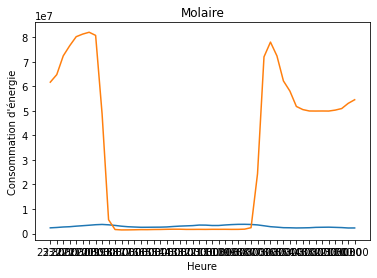

In [41]:
## Statistique descriptive reproduction de la molaire 

## Molaire IDF 

enedis_conso_idf_30_09_2022 = enedis_conso_idf[enedis_conso_idf["date"]=="2022-09-30"]
enedis_conso_idf_30_09_2022_soutirage_10576 = enedis_conso_idf_30_09_2022[enedis_conso_idf_30_09_2022["Nb points soutirage"]==10576]
enedis_conso_idf_30_09_2022_soutirage_10576["Heure"]=enedis_conso_idf_30_09_2022_soutirage_10576["Horodate"].apply(lambda x : x[11:16])
enedis_conso_idf_30_09_2022_soutirage_10576

plt.plot(enedis_conso_idf_30_09_2022_soutirage_10576["Heure"],enedis_conso_idf_30_09_2022_soutirage_10576["Total énergie soutirée (Wh)"] )
plt.plot(enedis_conso_idf_30_09_2022_soutirage_10576["Heure"],enedis_conso_idf_30_09_2022_soutirage_44273["Total énergie soutirée (Wh)"] )
plt.xlabel('Heure')
plt.ylabel("Consommation d'énergie")
plt.title('Molaire');
plt.show()

enedis_conso_idf_30_09_2022
enedis_conso_idf_30_09_2022_soutirage_44273 = enedis_conso_idf_30_09_2022[enedis_conso_idf_30_09_2022["Nb points soutirage"]==44273]
enedis_conso_idf_30_09_2022_soutirage_44273["Heure"]=enedis_conso_idf_30_09_2022_soutirage_10576["Horodate"].apply(lambda x : x[11:16])
enedis_conso_idf_30_09_2022_soutirage_44273




#plt.plot(enedis_conso_idf_30_09_2022_soutirage_10576["Heure"],enedis_conso_idf_30_09_2022_soutirage_10576["Total énergie soutirée (Wh)"])


In [116]:
## Statistique descriptives Température-consommation 
meteo_reg =pd.read_csv("/Users/jeremiedarracq/Stat-app/temperature_reg.csv",sep=";")
enedis_temp =pd.merge(enedis,meteo_reg,how='left',left_on=["date","Code région"],right_on=["date","code_insee_region"])

In [135]:
enedis_temp = enedis_temp[enedis_temp["Plage de puissance souscrite"] == "P0: Total <= 36 kVA"]
enedis_temp

###########################température-consommation idf 
enedis_temp_idf = enedis_temp[enedis_temp["Région"] == "Île-de-France"]



## température-consommation sur un particulier idf 


### température consommation sur l'ensemble de l'idf 


enedis_temp_idf_conso = enedis_temp_idf.drop(columns=["Code région","Plage de puissance souscrite","Courbe Moyenne n°1 (Wh)","Indice représentativité Courbe n°1 (%)","Courbe Moyenne n°2 (Wh)","code_insee_region","id","Indice représentativité Courbe n°2 (%)","Courbe Moyenne n°1 + n°2 (Wh)","Indice représentativité Courbe n°1 + n°2 (%)","Jour max du mois (0/1)","Semaine max du mois (0/1)","region","Horodate","Région"])
enedis_temp_idf_conso["Total énergie soutirée moyenne (Wh)"] = enedis_temp_idf["Total énergie soutirée (Wh)"]/enedis_temp_idf["Nb points soutirage"]
enedis_temp_idf_conso["Total énergie soutirée moyenne (Wh) standardisé"] = scale(enedis_temp_idf_conso["Total énergie soutirée (Wh)"])
enedis_temp_idf_conso["tmoy standardisé"] = scale(enedis_temp_idf_conso["tmoy"])
enedis_temp_idf_conso = enedis_temp_idf_conso.drop(columns=["Profil","Nb points soutirage","date","Total énergie soutirée (Wh)"])
enedis_temp_idf_conso.corr()


,tmin,tmax,tmoy,Total énergie soutirée moyenne (Wh),Total énergie soutirée moyenne (Wh) standardisé,tmoy standardisé
tmin,1.000000,0.715725,0.890300,-0.006181,-0.017526,0.890300
tmax,0.715725,1.000000,0.955235,-0.011238,-0.020982,0.955235
tmoy,0.890300,0.955235,1.000000,-0.009946,-0.021106,1.000000
Total énergie soutirée moyenne (Wh),-0.006181,-0.011238,-0.009946,1.000000,-0.330988,-0.009946
Total énergie soutirée moyenne (Wh) standardisé,-0.017526,-0.020982,-0.021106,-0.330988,1.000000,-0.021106
tmoy standardisé,0.890300,0.955235,1.000000,-0.009946,-0.021106,1.000000
